# Decision Tree 실습

# 1. 함수 익히기 및 모듈 불러오기

- 함수 익히기

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [2]:
clf.predict([[1, 1]])

array([1])

- 모듈 불러오기

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
from os import system

In [4]:
system("pip install graphviz")

0

In [14]:
import graphviz 

- 데이터 로드

In [5]:
Iris = load_iris()

In [13]:
Iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
Iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
Iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 2. 의사결정나무 구축 및 시각화

- 트리 구축

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Iris.data, Iris.target)


In [7]:
# 트리 이미지 저장
import pydot
#  graphviz 옵션 설정
dot_data = tree.export_graphviz(clf, out_file='decisonTree1.dot',
                               feature_names = Iris.feature_names,
                               class_names = Iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True
                               )
(graph, ) = pydot.graph_from_dot_file('decisonTree1.dot',encoding = 'utf8')
graph.write_png('decisonTree1.png')

- 트리의 시각화

In [17]:
#  graphviz 옵션 설정
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names = Iris.feature_names,
                               class_names = Iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True
                               )

graph = graphviz.Source(dot_data)

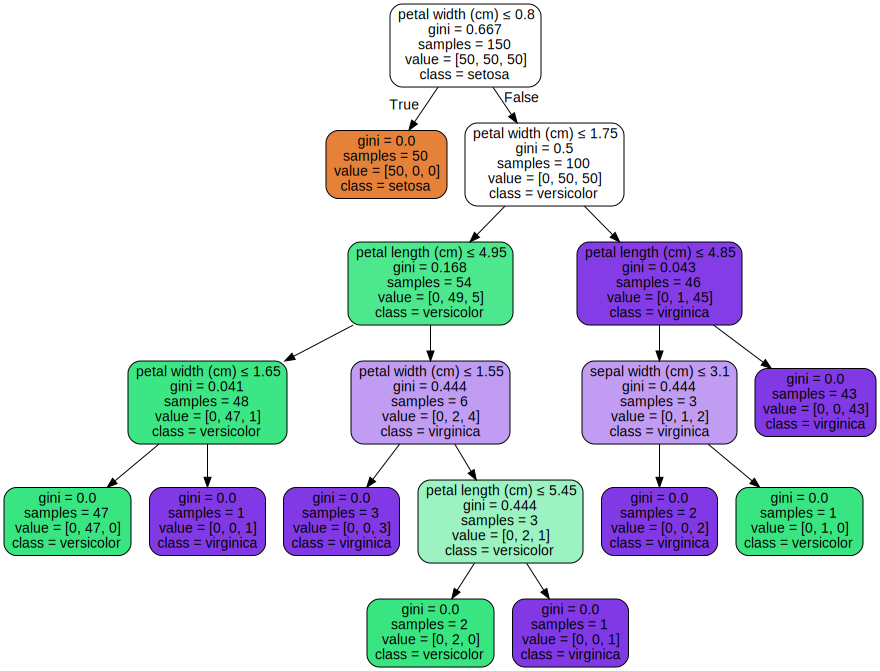

In [18]:
graph

- 엔트로피를 활용한 트리

In [19]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy")

In [20]:
clf2 = clf2.fit(Iris.data, Iris.target)

In [23]:
#  graphviz 옵션 설정
dot_data2 = tree.export_graphviz(clf2, out_file=None,
                               feature_names = Iris.feature_names,
                               class_names = Iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True
                               )

graph2 = graphviz.Source(dot_data2)

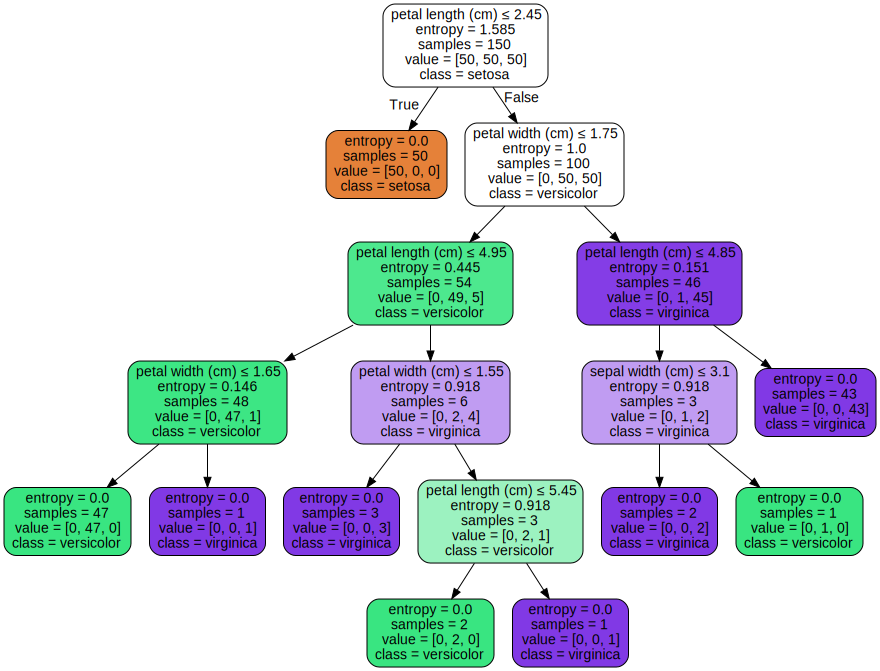

In [24]:
graph2

In [25]:
dot_data2 = tree.export_graphviz(clf2, out_file='decisonTree2.dot',
                               feature_names = Iris.feature_names,
                               class_names = Iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True
                               )
(graph2, ) = pydot.graph_from_dot_file('decisonTree2.dot',encoding = 'utf8')
graph2.write_png('decisonTree2.png')

- 프루닝

In [27]:
clf3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [28]:
clf3.fit(Iris.data, Iris.target)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [30]:
dot_data3 = tree.export_graphviz(clf3, out_file=None,
                               feature_names = Iris.feature_names,
                               class_names = Iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True
                               )

graph3 = graphviz.Source(dot_data3)

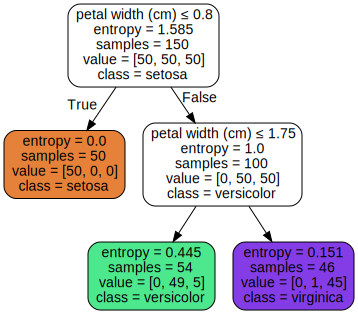

In [31]:
graph3

In [29]:
dot_data3 = tree.export_graphviz(clf3, out_file='decisonTree3.dot',
                               feature_names = Iris.feature_names,
                               class_names = Iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True
                               )
(graph3, ) = pydot.graph_from_dot_file('decisonTree3.dot',encoding = 'utf8')
graph3.write_png('decisonTree3.png')

- Confusion Matrix 구하기

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Iris.target,clf.predict(Iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [35]:
confusion_matrix(Iris.target,clf2.predict(Iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [37]:
confusion_matrix(Iris.target,clf3.predict(Iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

# 3. Training - Test 구분 및 Confusion matrix 계산

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Iris.data, Iris.target, stratify=Iris.target, random_state = 1)

In [41]:
clf4 = tree.DecisionTreeClassifier(criterion="entropy")

In [42]:
clf4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
confusion_matrix(y_test, clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

# 4. Decision regression tree

- 모듈 불러오기 및 데이터 생성

In [59]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- Regression tree 구축

In [60]:
regr1 = tree.DecisionTreeRegressor(max_depth = 2)
regr2 = tree.DecisionTreeRegressor(max_depth = 5)

In [61]:
regr1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [62]:
regr2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [63]:
# 새 데이터 생성
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]

In [64]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

In [65]:
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

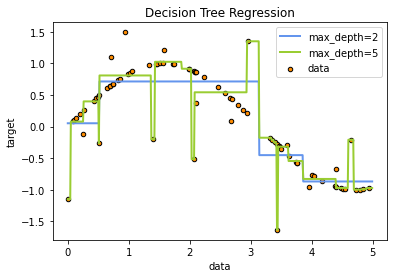

In [66]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [67]:
dot_data4 = tree.export_graphviz(regr2, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

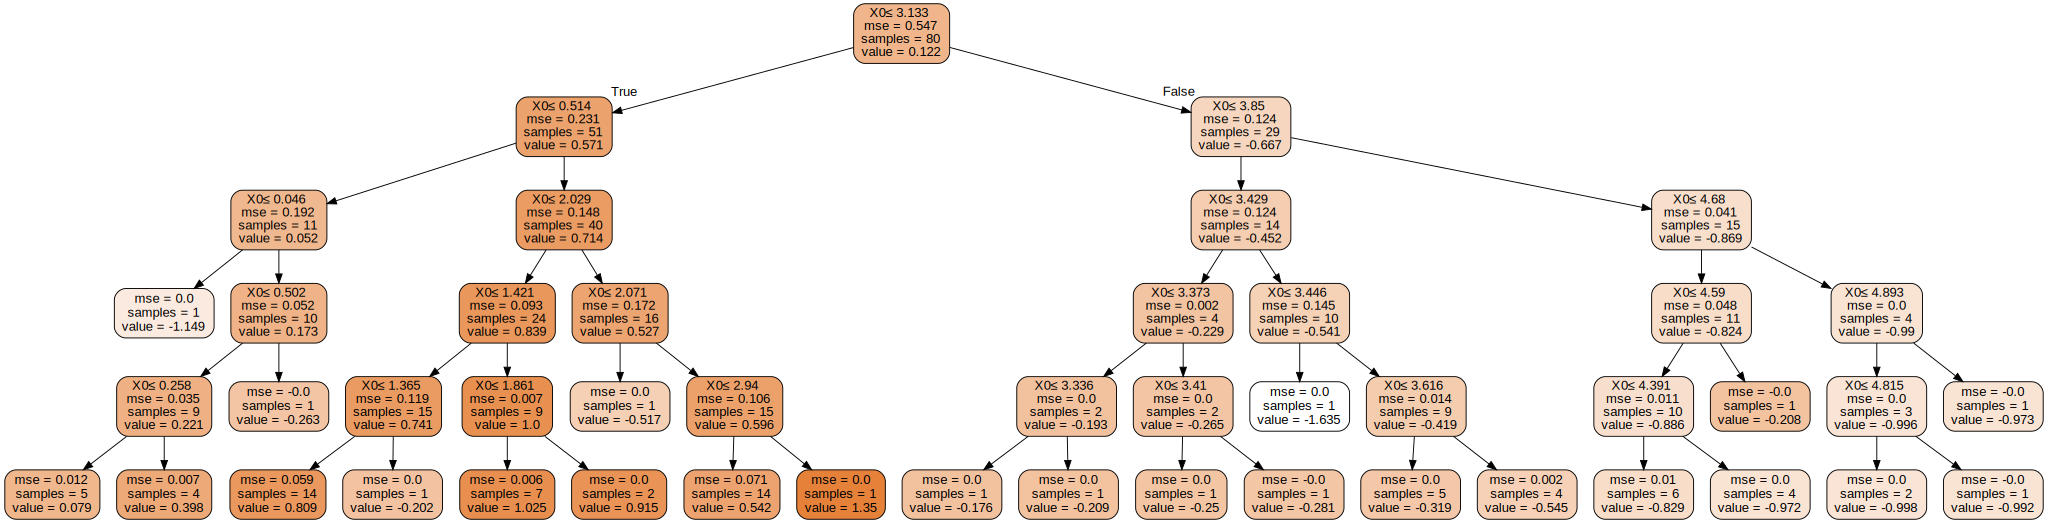

In [68]:
graph4 = graphviz.Source(dot_data4) 
graph4

In [69]:
dot_data4 = tree.export_graphviz(regr2, out_file='regressionTree2.dot',
                               filled = True, rounded = True,
                               special_characters = True
                               )
(graph4, ) = pydot.graph_from_dot_file('regressionTree2.dot',encoding = 'utf8')
graph4.write_png('regressionTree2.png')

In [70]:
dot_data5 = tree.export_graphviz(regr1, out_file='regressionTree1.dot',
                               filled = True, rounded = True,
                               special_characters = True
                               )
(graph5, ) = pydot.graph_from_dot_file('regressionTree1.dot',encoding = 'utf8')
graph5.write_png('regressionTree1.png')